###  1. Aufgabe (10 Punkte):   Logistische Regression 
Importieren Sie den Datensatz spiders.txt. Der Datensatz beschreibt das Vorkommen der “burrowing wolf  spider” (Lycosa ishikariana) an verschiedenen Stränden in Abhängigkeit von der Größe der Sandkörner.

(Format: grain size (mm), spiders (0=absent, 1=present)).  

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# make plots bigger
plt.rcParams['figure.figsize'] = 12, 12  

In [2]:
#loadData

spiderData = pd.read_csv("./spiders.txt",delimiter=',', dtype={'names': ('grain_size', 'spiders'),
                     'formats': ('f4', 'i4')}, names = ['grain_size', 'spiders'])
#make 

spiderData.head()

,grain_size,spiders
0,0.245,0
1,0.247,0
2,0.285,1
3,0.299,1
4,0.327,1


In [3]:
X = np.array(spiderData['grain_size'])
y = np.array(spiderData['spiders'])
groups = spiderData.groupby("spiders")


#Extending Datapoints 
X_xtr = np.insert(X.reshape(28,1), 1, values=1, axis=1).T
X_xtr


array([[ 0.245,  0.247,  0.285,  0.299,  0.327,  0.347,  0.356,  0.36 ,
         0.363,  0.364,  0.398,  0.4  ,  0.409,  0.421,  0.432,  0.473,
         0.509,  0.529,  0.561,  0.569,  0.594,  0.638,  0.656,  0.816,
         0.853,  0.938,  1.036,  1.045],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ]])

#### a. (5 Punkte) 
Implementieren Sie das in der Vorlesung vorgestellte Verfahren (Gradientenabstieg) zur  Bestimmung der Regressionskoeffizienten β für die logistische Regression.   Verwenden Sie dabei als initialen Wert β=[0;0]. Verwenden Sie die Schrittweite α=0.1  für den  Gradientenabstieg. Plotten Sie jeweils nach 1, 10, 100 und 1000 Iterationen die Funktion p(x,β), sowie die Datenpunkte.  

In [4]:
def printIt(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlabel('Grainsize')
    ax.set_ylabel('Probability')

    for name, group in groups:
        ax.plot(group.grain_size, group.spiders, marker='o', linestyle='', label=name, alpha = .6)
    plt.plot(x,y)
    ax.legend()
    plt.xlim(0,1.2)
    plt.ylim(-0.1,1.2)
    plt.show()

Iteration: 0, beta is [0 0]


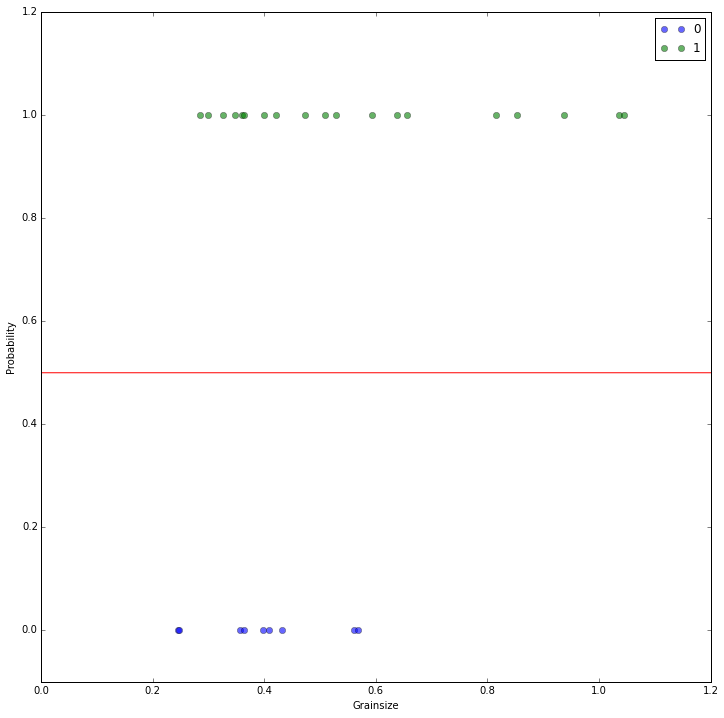

Iteration: 1, beta is [ 0.3655  0.5   ]


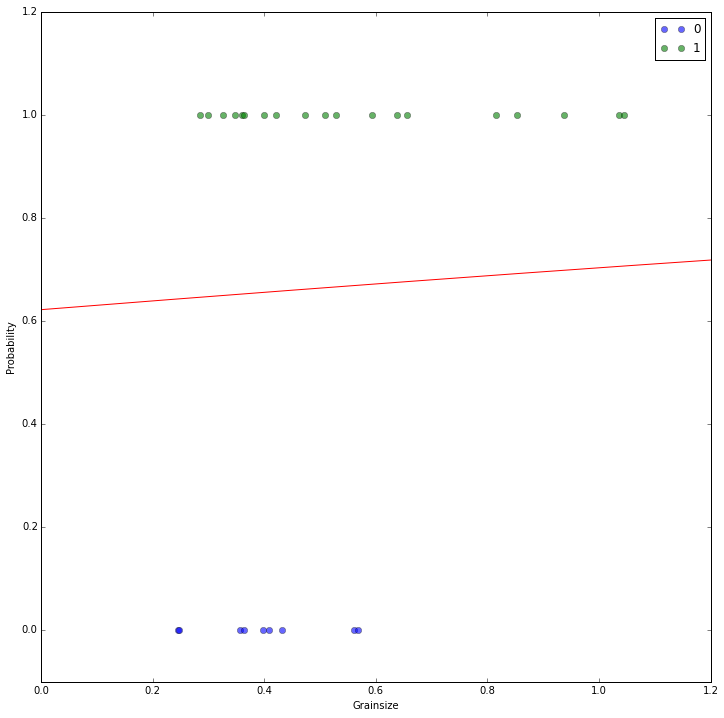

Iteration: 10, beta is [ 1.02970207  0.27781695]


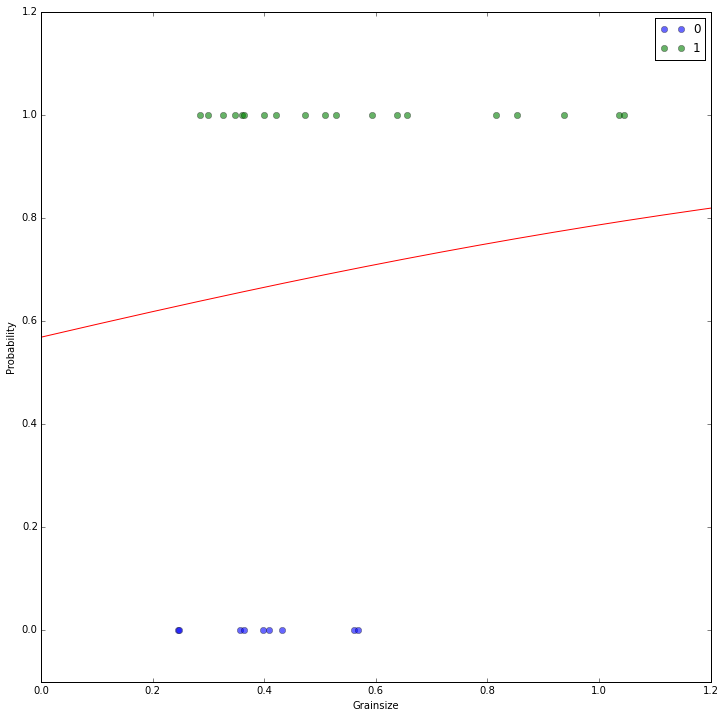

Iteration: 100, beta is [ 3.78828021 -1.05604195]


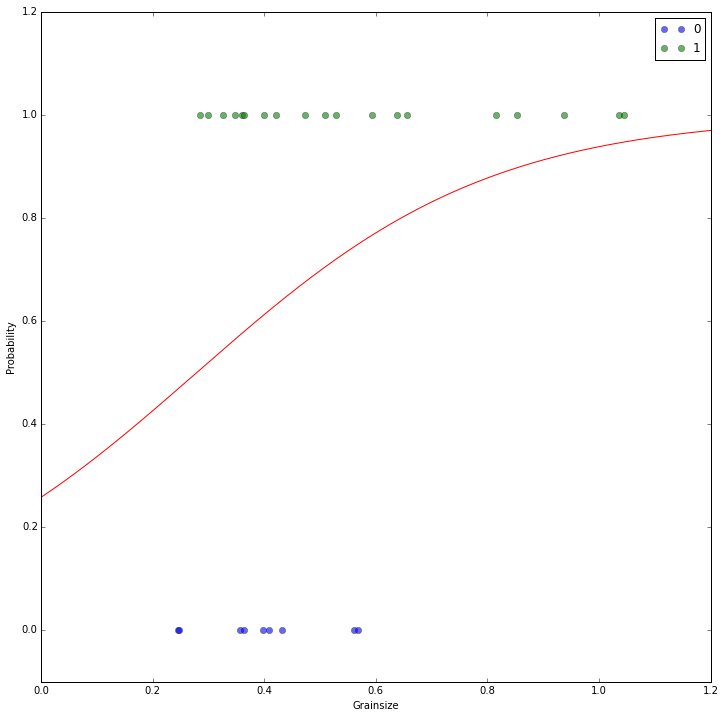

Iteration: 1000, beta is [ 5.12130467 -1.64751727]


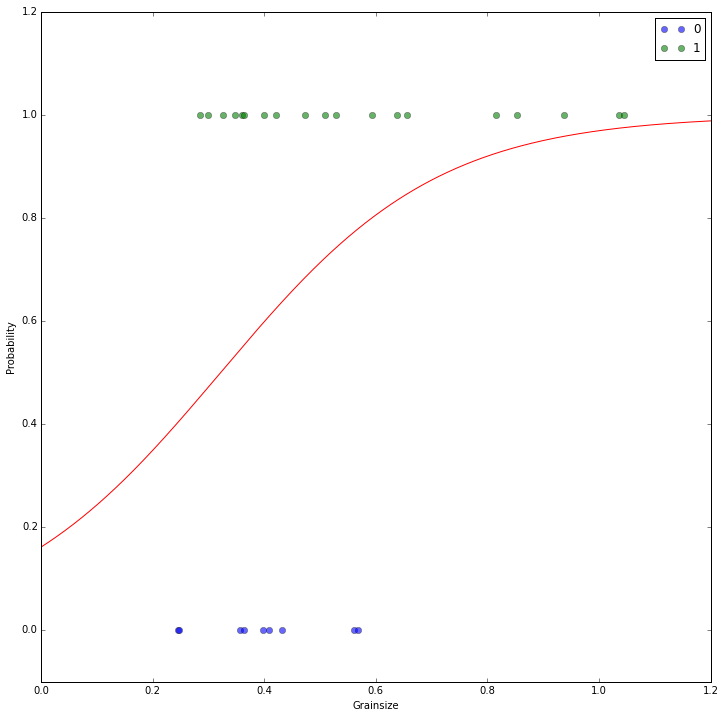

Iteration: 10000, beta is [ 5.1215528 -1.647625 ]


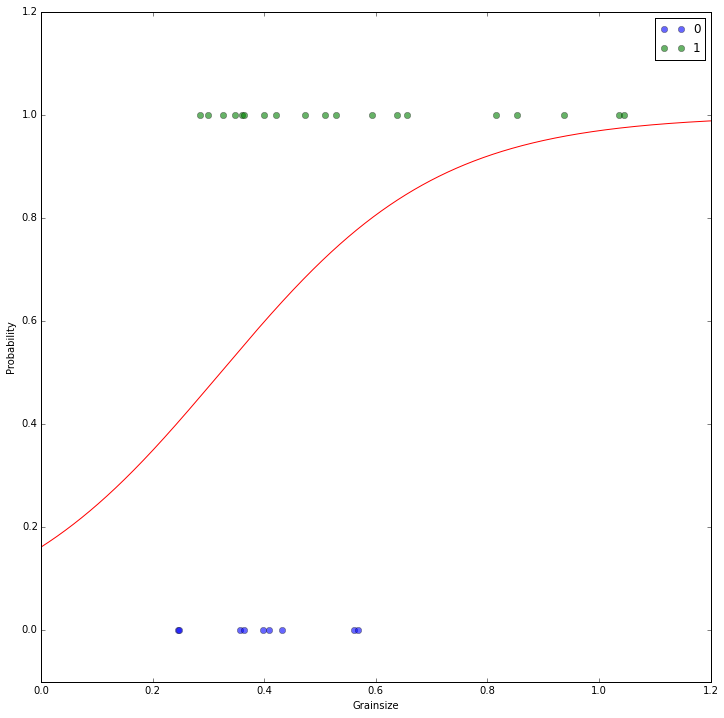

Iteration: 100000, beta is [ 5.1215528 -1.647625 ]


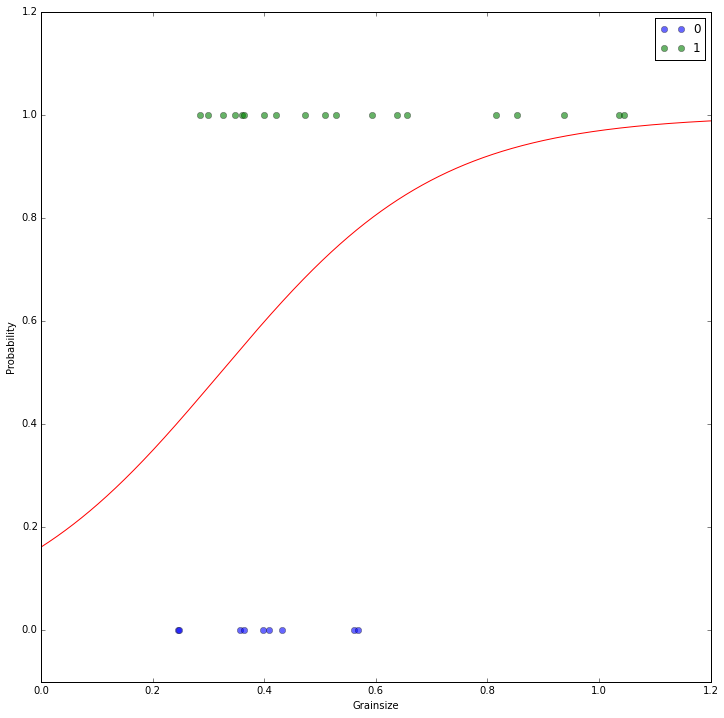

In [5]:


b  = np.array([ 0,0])
alpha = 0.1 
printIter = [0,1,10,100,1000,10000,100000]

p = lambda x, beta : np.exp(np.dot(beta.T,x)) / (1 +np.exp( np.dot(beta.T,x)))

lrng = np.arange(-2,2,0.0001)

lrng_xtr = np.insert(lrng.reshape(lrng.size,1), 1, values=1, axis=1).T

for i in range(100001):
    if(i in printIter):
        print "Iteration: "+ str(i)+ ", beta is " + str(b)
        printIt(lrng,p(lrng_xtr,b))
    #Gradienten Anstieg
    b = b + alpha *  np.dot(X_xtr,(y- p(X_xtr,b)))



#### b. (1 Punkte) 
Berechnen Sie, ab welcher Größe der Sandkörner es wahrscheinlicher ist, Spinnen  anzutreffen (als keine Spinnen anzutreffen).

In [6]:
#p(lrng_xtr,b)
# calculate the inverse F^-1(0.5) or do it like this 
lrng_xtr[:,0]
for i in range(lrng_xtr.shape[1]):
    x = lrng_xtr[:,i]
    if p(x,b)> 0.5:
        print x[0]
        break;

0.3218


\begin{align}
\frac{e^{b^tx}}{1+ e^{b^tx}} &= 0.5\\
e^{b^tx} &= 0.5 + 0.5e^{b^tx} \\
0.5e^{b^tx} &= 0.5 \\
e^{b^tx} &= 1\\
\end{align}
$e^{b^tx}$ ist nur 1 wenn $b^t \cdot x$ orthogonal zu einander stehen.
Daher:<br><br>
\begin{align}
\left(\begin{matrix}
 5.1215528  \\
 -1.647625 \\
\end{matrix}\right)
\cdot
\left( \begin{matrix}
 x \\
 1 \
\end{matrix}\right) &= 0\\
5.1215528x &= 1.647625 \\
         x &= 0.32170419096
\end{align}
$\rightarrow$ Ab einer Größe von 0.32170419096 mm ist es wahrscheinlicher das Spinnen vorhanden sind als nicht.





#### c. (4 Punkte) 
Plotten Sie die log-likelihood Funktion l(β) des Datensatzes für das Intervall  $ β_0 = [-100, 100] und  β_1 = [-100, 100] in einem dreidimensionalen Koordinatensystem. Plotten Sie in     dem selben Diagram die log-likelihood des von Ihnen in Aufgabe a) berechneten β als    dreidimensionalen Punkt.

(Siehe ​ http://www.inf.fu­berlin.de/inst/ag­ki/rojas_home/documents/tutorials/logistic.pdf​  für die  Definition der log­likelihood Funktion).  

In [7]:
lbeta = lambda beta : np.sum(y*np.dot(beta.T,X_xtr)) - np.sum(np.log(1+np.exp(np.dot(beta.T,X_xtr))))

acc = 1
res = []
b0 = np.arange(-100,100,acc)
b1 = np.arange(-100,100,acc)

for i in b0:
    for j in b1:
        res.append(lbeta(np.array([i,j])))

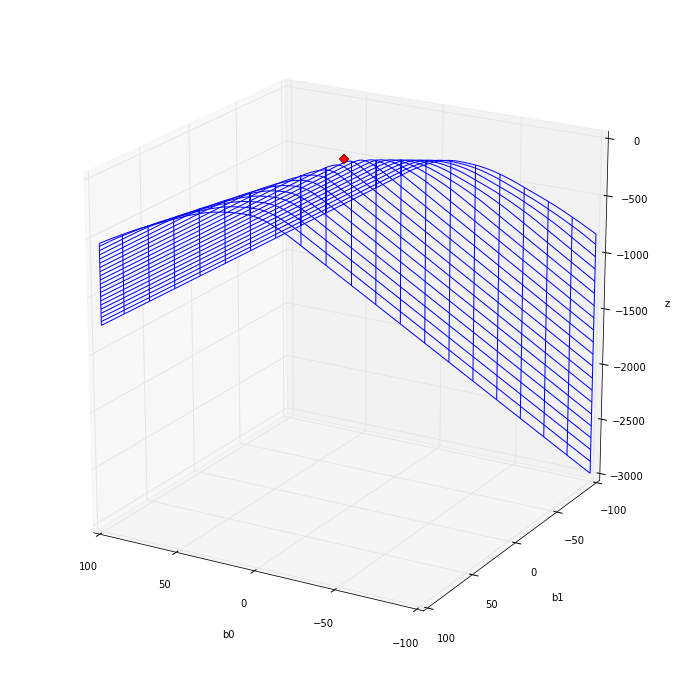

In [8]:
from mpl_toolkits.mplot3d import Axes3D


z = np.array(res).reshape(200,200)

fig = plt.figure(0)
ax  = fig.add_subplot(111, projection='3d',azim = 120,elev = 20)
ax.plot_wireframe(b0,b1,z,rstride=10, cstride=10)
ax.plot([5.1215528],[-1.647625],[lbeta(np.array([5.1215528,-1.647625]))],markersize=10,marker=(4,0,90),color="r")
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('z')
plt.show()

In [9]:
lbeta(np.array([5.1215528,-1.647625]))

-15.31577391136523